# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr
import random 
import pickle

# Libraries for data preparation and model building
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.neural_network as NNR
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv("df_train.csv") # load the train data
df_test = pd.read_csv("df_test.csv")  # load the test data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df_train.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [5]:
df_train.shape

(8763, 49)

In [6]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

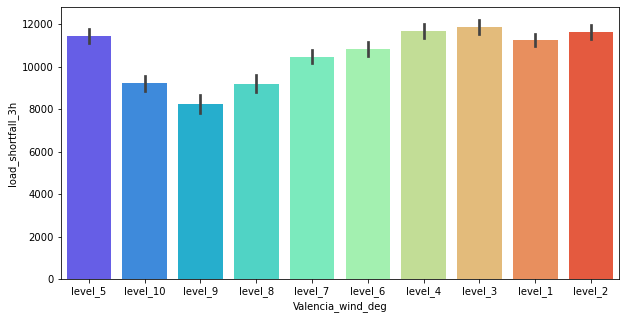

In [7]:
# plot relevant feature interactions
plt.figure(figsize=[10,5])
sns.barplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_train, palette="rainbow")

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

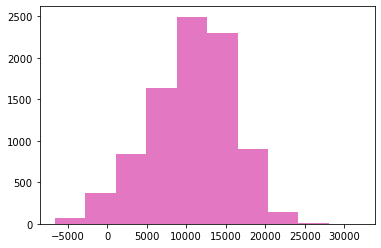

In [8]:
# plot relevant feature interactions
plt.hist(df_train['load_shortfall_3h'], color='tab:pink')

<AxesSubplot:>

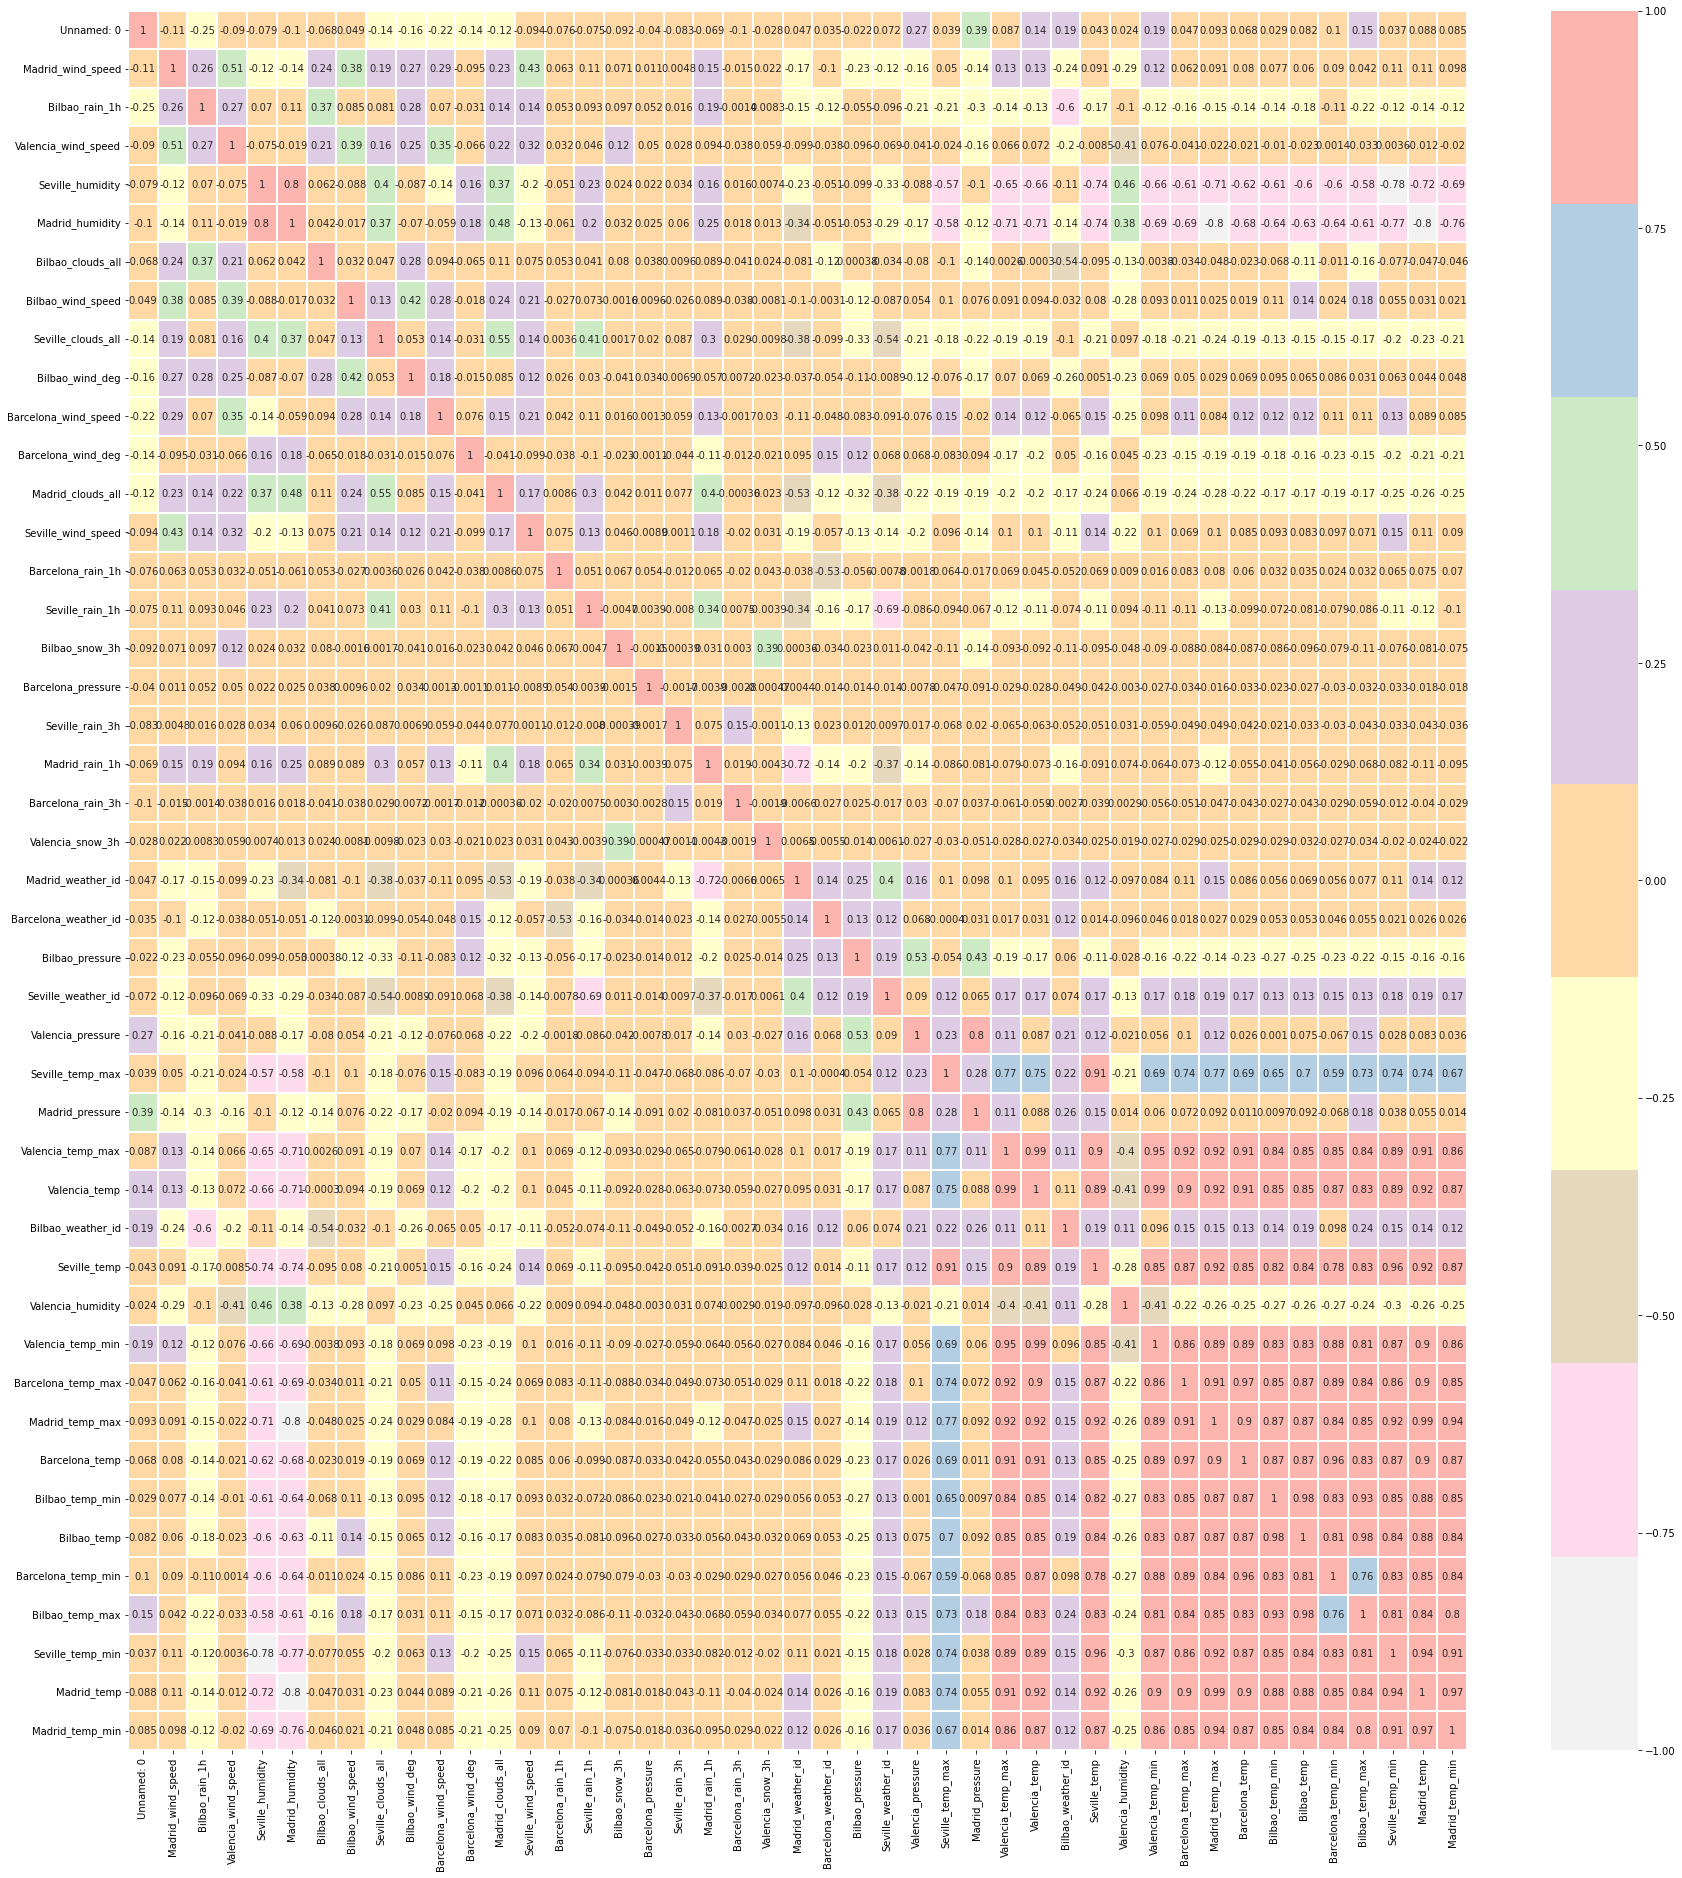

In [9]:
# evaluate correlation
train_features = df_train.drop(['load_shortfall_3h'], axis =1)
train_corr = train_features.corr()
plt.figure(figsize=(30,32))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='Pastel1_r', linewidth=0.1)

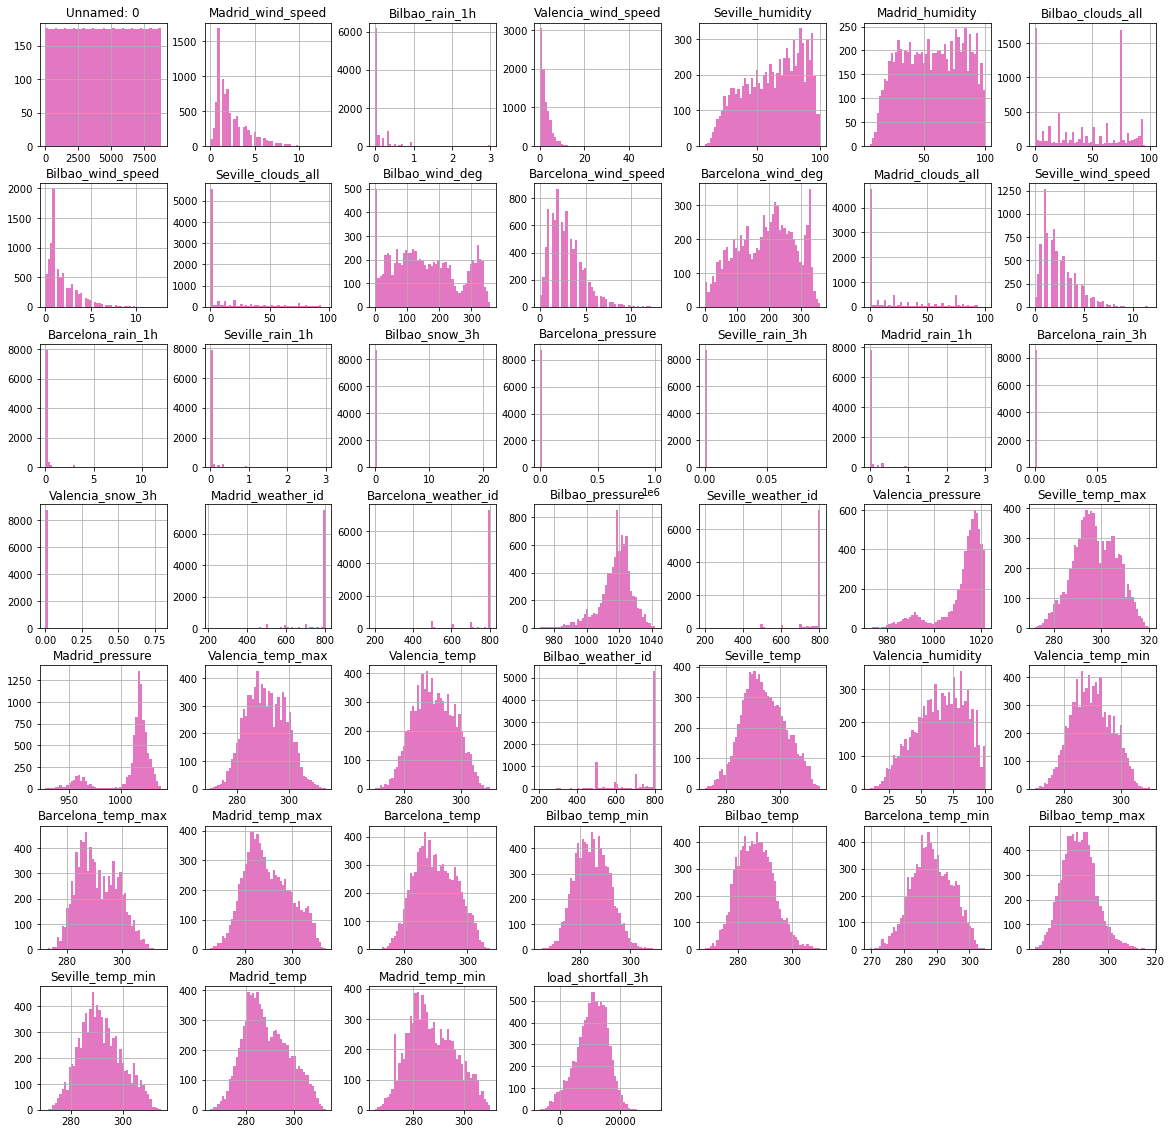

In [10]:
# have a look at feature distributions
df_train.hist(bins=50, figsize=(20,20), color = 'tab:pink')
plt.show()

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

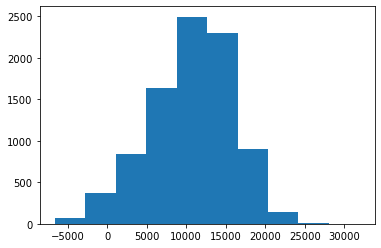

In [11]:
# have a look at feature distributions
plt.hist(df_train['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [12]:
#check for missing values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [13]:
# get mode from both data sets to replace missing values with
mode = pd.concat([df_train.Valencia_pressure]).mode()

In [14]:
# remove missing values/ features
print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 49)  |  Test data shape: (2920, 48)


In [15]:
# remove missing values/ features
#test set 
df_test.Valencia_pressure.fillna(mode[0], inplace=True)
df_test = df_test.drop(['Unnamed: 0'],axis =1)

In [16]:
# remove missing values/ features
df_train.Valencia_pressure.fillna(mode[0], inplace=True)
df_train = df_train.drop(['Unnamed: 0'],axis =1)

In [17]:
# check if null values have been replaced

df_train['Valencia_pressure'].isnull().sum()

0

In [18]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [19]:
# create new features
pressures = []
for T in df_train['Seville_temp']:
    p_h = 101325 * np.exp((-5.6e-26 * 9.8* 680)/(1.380649e-23 * float(T))) *0.01 
    pressures.append(p_h+100)
df_train['Seville_pressure'] = pressures

In [20]:
#create new feature for df_test

pressures_a = []
for T in df_test['Seville_temp']:
    p_h = 101325 * np.exp((-5.6e-26 * 9.8* 680)/(1.380649e-23 * float(T))) *0.01 
    pressures_a.append(p_h+100)
df_test['Seville_pressure'] = pressures_a

In [21]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [22]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [23]:
df_test['Valencia_wind_deg'].head() 
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].astype(int)
df_test['Valencia_wind_deg'].head()

0    8
1    8
2    7
3    7
4    7
Name: Valencia_wind_deg, dtype: int32

In [24]:
df_train['Valencia_wind_deg'].head() 
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].astype(int)
df_train['Valencia_wind_deg'].head()

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int32

In [27]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [28]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [29]:
# engineer existing features
# Transform Features
df_train['time'] = pd.to_datetime(df_train['time'])




# day
df_train['Day'] = df_train['time'].dt.day


# month
df_train['Month'] = df_train['time'].dt.month


# year
df_train['Year'] = df_train['time'].dt.year


# hour
df_train['Start_hour'] = df_train['time'].dt.hour


# Drop Feature
df_train.drop(['time'] , axis=1 , inplace=True)


In [30]:
#Scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)


df_train_scaled = pd.DataFrame(scaled_features, index=df_train.index)


#Add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = df_train.load_shortfall_3h.values

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [31]:
# split data
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df_train.drop(['load_shortfall_3h'], axis=1)
y = df_train['load_shortfall_3h']

In [32]:
X.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,2015,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,2015,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1,1,2015,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1,1,2015,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1,1,2015,15


In [33]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [34]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [35]:
# create targets and features dataset

In [36]:
# create one or more ML models
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=90, max_depth=29, random_state=23)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=29, n_estimators=90, random_state=23)

In [37]:
# evaluate one or more ML models
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3073.55788303581


In [38]:
# create one or more ML models
from sklearn.ensemble import BaggingRegressor
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=7)
d_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [39]:
# evaluate one or more ML models
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = d_tree.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3934.8554244100824


In [40]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df_train.drop(['load_shortfall_3h'], axis=1)
y = df_train['load_shortfall_3h']

In [41]:
# create model object
lm = LinearRegression()

In [42]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# evaluate one or more ML models
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = lm.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 4690.153875813683


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [44]:
# Compare model performance
from sklearn import metrics
import math
# dictionary of results
results_dict = {'Test RMSE':
                    {
                        "RF": np.sqrt(mean_squared_error(y_test,RF.predict(X_test))),
                        "d_tree": np.sqrt(mean_squared_error(y_test,d_tree.predict(X_test))),
                        "lm": np.sqrt(mean_squared_error(y_test,lm.predict(X_test)))
                    }
                }

In [45]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [46]:
results_df

,Test RMSE
RF,3073.557883
d_tree,3934.855424
lm,4690.153876


In [ ]:
# Converting the predictions to a dataframe
# Kaggle submission file

In [47]:
pred = pd.DataFrame(y_pred , columns =['load_shortfall_3h'])
pred.head()

,load_shortfall_3h
0,13701.866813
1,6865.219832
2,11624.081546
3,10632.223604
4,8937.647100


In [48]:
output = pd.DataFrame({'time': df_test['time']})
submission = output.join(pred)
submission.to_csv('randomforest.csv',index = False)
submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13701.866813
1,2018-01-01 03:00:00,6865.219832
2,2018-01-01 06:00:00,11624.081546
3,2018-01-01 09:00:00,10632.223604
4,2018-01-01 12:00:00,8937.647100


In [49]:
# load the pickled model from file
import pickle

model_save_path = "best_performing_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(y_pred,file)

In [50]:
# Choose best model and motivate why it is the best choice


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic


Random forest is a commonly-used machine learning algorithm,This model is an ensemble method.Random forests combine multiple homogeneous models (i.e. decision trees) in a clever way to make predictions.

The algorithm can be broken down into the following steps:
1.Create a new dataset from the existing dataset (bootstrapping).
2.Fit a Decision Tree on this dataset.
3. Randomly sample X features at each node of the tree.(Repeat hundreds of times.)
4.Combine the predictions from every tree (aggregating).

Bootstrapping is used to calculate confidence intervals and standard error as well as playing the key part in the the Random Forest model.

The Random Forest builds decision trees on different samples and takes their majority vote for classification 
It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

the random forest can generalize over data in a better way. This randomized feature selection makes random forest much more accurate than a decision tree which is why this is the best performing model.